**Name : Janhavi Pawar  
PRN : 202201070035  
Branch : Electronics and Telecommunication  
Dataset Used : Heart Disease Dataset**

## **Implementation of Logistic Regression from Scratch**

Logistic regression is a supervised machine learning algorithm used for classification tasks where the goal is to predict the probability that an instance belongs to a given class or not.

Accuracy: 77.40%


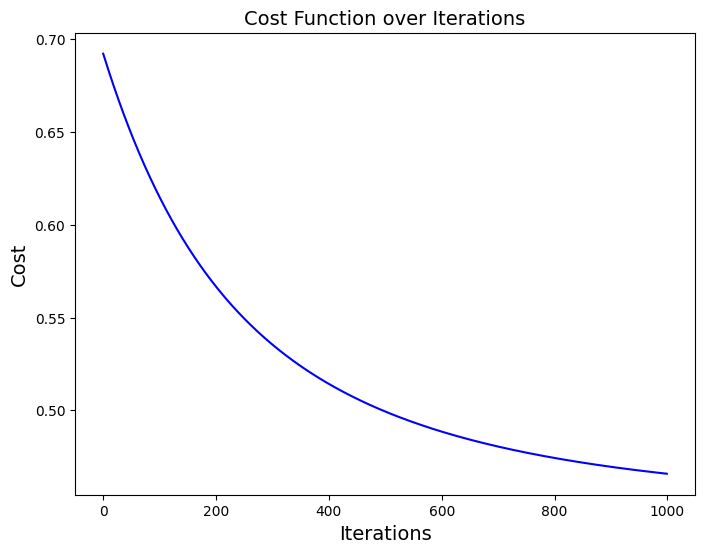

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Logistic function (sigmoid)
def logistic(x):
    return 1 / (1 + np.exp(-x))

# Log loss function
def log_loss(y, y_dash):
    return - (y * np.log(y_dash)) - ((1 - y) * np.log(1 - y_dash))

# Cost function using vectorization
def cost_func_vec(y, y_dash):
    m = len(y)
    loss_vec = np.array([log_loss(y[i], y_dash[i]) for i in range(m)])
    cost = np.dot(loss_vec, np.ones(m)) / m
    return cost

# Cost function in terms of model parameters (using vectorization)
def cost_logreg_vec(X, y, w, b):
    m, n = X.shape
    z = np.matmul(X, w) + b
    y_dash = logistic(z)
    return cost_func_vec(y, y_dash)

# Gradient computation
def compute_gradients(X, y, w, b):
    m = len(y)
    z = np.matmul(X, w) + b
    y_dash = logistic(z)

    dw = np.dot(X.T, (y_dash - y)) / m
    db = np.sum(y_dash - y) / m

    return dw, db

# Gradient Descent for logistic regression
def gradient_descent(X, y, w, b, learning_rate, iterations):
    cost_history = []

    for _ in range(iterations):
        dw, db = compute_gradients(X, y, w, b)

        # Update weights and bias
        w -= learning_rate * dw
        b -= learning_rate * db

        # Compute cost after updating
        cost = cost_logreg_vec(X, y, w, b)
        cost_history.append(cost)

    return w, b, cost_history

# Full logistic regression model
def logistic_regression(X, y, learning_rate=0.01, iterations=1000):
    m, n = X.shape
    w = np.zeros(n)  # Initialize weights as zero
    b = 0            # Initialize bias as zero

    w, b, cost_history = gradient_descent(X, y, w, b, learning_rate, iterations)

    return w, b, cost_history

# Load the heart disease dataset
heart_df = pd.read_csv("heart_disease_dataset.csv")  # Update with the correct path

# Selecting two numerical features for visualization
features = ['cholesterol', 'blood_pressure']
target_col = 'heart_disease'
X = heart_df[features].values
y = heart_df[target_col].values

# Normalize the features
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std

# Train the logistic regression model
learning_rate = 0.01
iterations = 1000
w, b, cost_history = logistic_regression(X, y, learning_rate, iterations)

# Predict function
def predict(X, w, b):
    z = np.matmul(X, w) + b
    return logistic(z)

# Predictions
predictions = predict(X, w, b)
predictions = (predictions >= 0.5).astype(int)

# Compute accuracy
accuracy = np.mean(predictions == y)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot the cost function history
plt.figure(figsize=(8, 6))
plt.plot(range(len(cost_history)), cost_history, color='blue')
plt.xlabel("Iterations", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost Function over Iterations", fontsize=14)
plt.show()

## **Implementation of Logistic Regression with Library**

Accuracy: 0.99
Confusion Matrix:
 [[ 98   1]
 [  1 100]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        99
           1       0.99      0.99      0.99       101

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



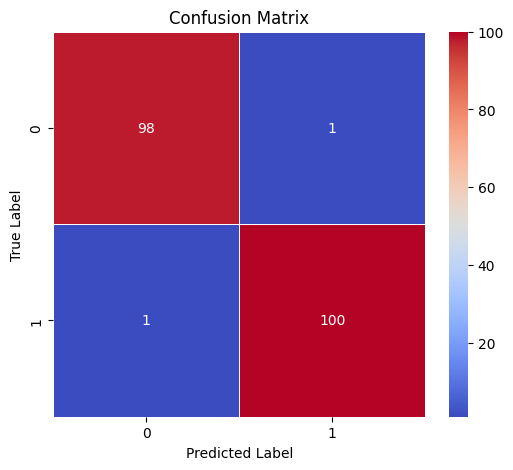

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the heart disease dataset
file_path = '/content/heart_disease_dataset.csv'
df = pd.read_csv(file_path)

# Features and target selection
X = df[['age', 'sex', 'cholesterol', 'blood_pressure', 'heart_rate', 'diabetes', 'smoking', 'exercise']].values
y = df['heart_disease'].values  # Target column

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



## **Activation Functions**

### Sigmoid Function

The sigmoid function is a mathematical equation that maps real values to a range between 0 and 1. It's a commonly used activation function in neural networks.

In [ ]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [ ]:
sigmoid(100)

1.0

In [ ]:
sigmoid(-2)

0.11920292202211755

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_sigmoid():
    x = np.linspace(-10, 10, 100)
    y = 1 / (1 + np.exp(-x))

    plt.plot(x, y)
    plt.xlabel('Input')
    plt.ylabel('Sigmoid Output')
    plt.title('Sigmoid Activation Function')
    plt.grid(True)
    plt.show()

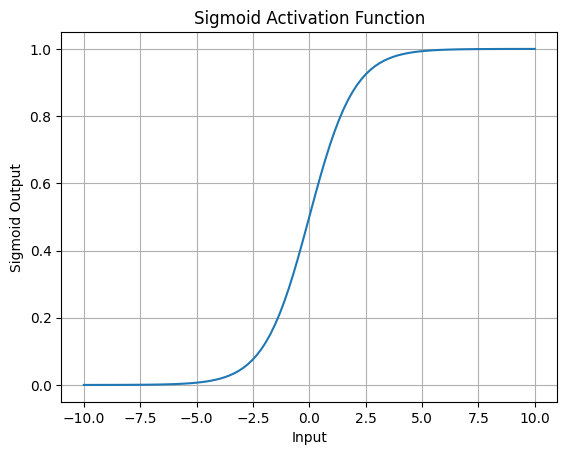

In [ ]:
plot_sigmoid()

### TANH Function

The hyperbolic tangent (tanh) function is a mathematical function that transforms input values into output values between -1 and 1.

In [ ]:
def tanh(x):
  return (math.exp(x)-math.exp(-x))/(math.exp(x)+math.exp(-x))

In [ ]:
tanh(-56)

-1.0

In [ ]:
tanh(1)

0.7615941559557649

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_tanh():

    x = np.linspace(-10, 10, 100)

    tanh = np.tanh(x)

    plt.plot(x, tanh)
    plt.title("Hyperbolic Tangent (tanh) Activation Function")
    plt.xlabel("x")
    plt.ylabel("tanh(x)")
    plt.grid(True)
    plt.show()

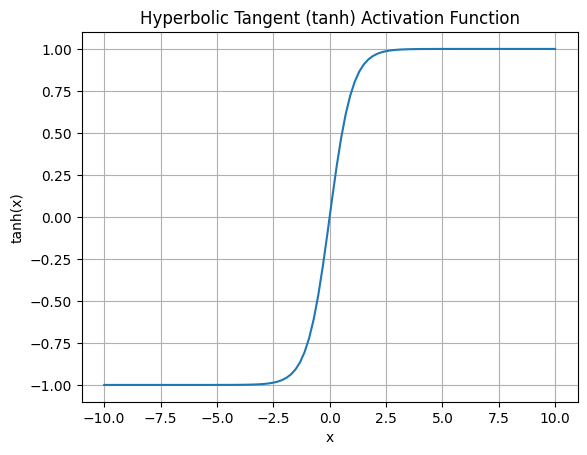

In [ ]:
plot_tanh()

### ReLU Functiuon

ReLU, or Rectified Linear Unit, is a mathematical function used to introduce non-linearity to artificial neural networks.

In [ ]:
def relu(x):
  return max(0,x)

In [ ]:
relu(-100)

0

In [ ]:
relu(8)

8

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_relu():

    x = np.linspace(-10, 10, 100)

    relu = np.maximum(0, x)

    plt.plot(x, relu)
    plt.title("ReLU Activation Function")
    plt.xlabel("x")
    plt.ylabel("ReLU(x)")
    plt.grid(True)
    plt.show()

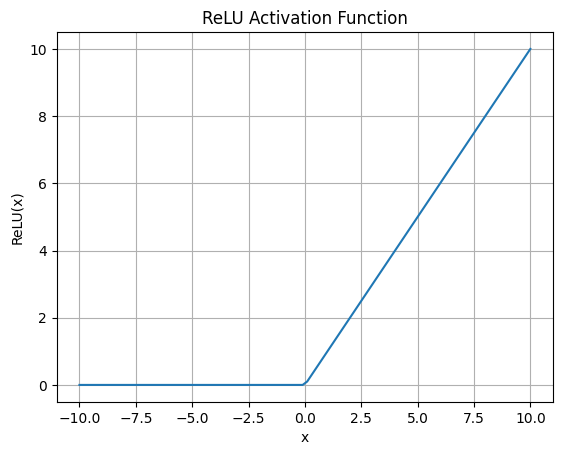

In [ ]:
plot_relu()

## **Log Loss Function**

**Log Loss¶**

The loss function, which corresponds to the true value and predicted value of a single observation. The cost function can be thought of as expected loss or average loss over a group of observations.




In [4]:
import numpy as np
from sklearn.metrics import log_loss

# Log loss function for vectorized input
def log_loss_vec(y, y_prob):
    """Computes log loss for an array of true values and predicted probabilities.

    Args:
      y      (array): True labels (0 or 1)
      y_prob (array): Predicted probabilities (values between 0 and 1)

    Returns:
      loss (float): Mean log loss
    """
    epsilon = 1e-15  # Prevent log(0)
    y_prob = np.clip(y_prob, epsilon, 1 - epsilon)  # Clip probabilities
    loss = -np.mean(y * np.log(y_prob) + (1 - y) * np.log(1 - y_prob))
    return loss

# Get predicted probabilities for class 1
y_prob = model.predict_proba(X_test)[:, 1]

# Compute log loss for dataset
log_loss_value = log_loss_vec(y_test, y_prob)

print(f"Log Loss (Custom): {log_loss_value:.4f}")

# Compare with sklearn's log loss
sklearn_log_loss = log_loss(y_test, y_prob)
print(f"Log Loss (sklearn): {sklearn_log_loss:.4f}")


Log Loss (Custom): 0.0981
Log Loss (sklearn): 0.0981


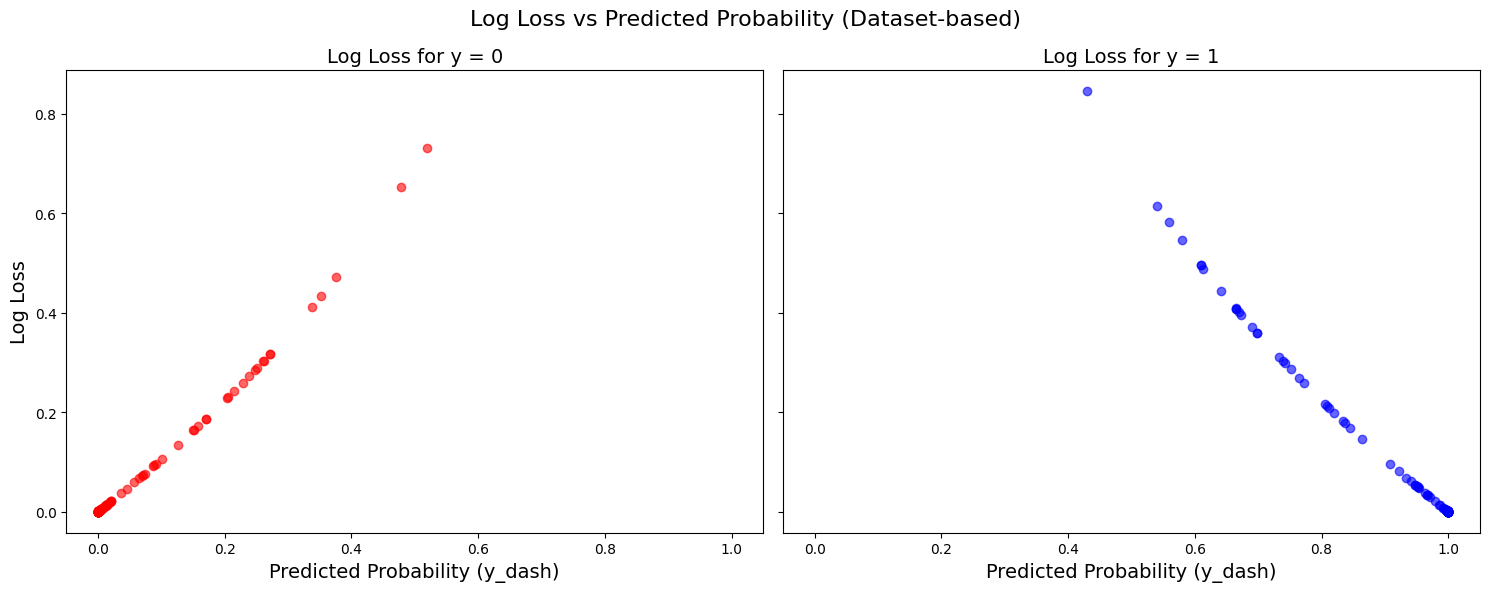

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

# Get predicted probabilities
y_dash = model.predict_proba(X_test)[:, 1]  # Probabilities for y = 1
y_test_actual = y_test  # True labels

# Define element-wise log loss function
def log_loss_vec(y_true, y_pred):
    return - (y_true * np.log(y_pred + 1e-9)) - ((1 - y_true) * np.log(1 - y_pred + 1e-9))

# Compute log loss for each data point
log_losses = log_loss_vec(y_test_actual, y_dash)

# Separate log loss values based on actual class labels
y_dash_0 = y_dash[y_test_actual == 0]
y_dash_1 = y_dash[y_test_actual == 1]
log_loss_0 = log_losses[y_test_actual == 0]
log_loss_1 = log_losses[y_test_actual == 1]

# Plot log loss curves
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharex=True, sharey=True)

ax[0].scatter(y_dash_0, log_loss_0, color='red', alpha=0.6)
ax[0].set_title("Log Loss for y = 0", fontsize=14)
ax[0].set_xlabel("Predicted Probability (y_dash)", fontsize=14)
ax[0].set_ylabel("Log Loss", fontsize=14)

ax[1].scatter(y_dash_1, log_loss_1, color='blue', alpha=0.6)
ax[1].set_title("Log Loss for y = 1", fontsize=14)
ax[1].set_xlabel("Predicted Probability (y_dash)", fontsize=14)

plt.suptitle("Log Loss vs Predicted Probability (Dataset-based)", fontsize=16)
plt.tight_layout()
plt.show()


##**Cross Entropy**

Cross-entropy loss also known as log loss is a metric used in machine learning to measure the performance of a classification model. Its value ranges from 0 to 1 with lower being better. An ideal value would be 0. The goal of an optimizer tasked with training a classification model with cross-entropy loss would be to get the model as close to 0 as possible.

In [7]:
import numpy as np

# Define Cross-Entropy Loss function
def cross_entropy_loss(y_true, y_pred):
    """
    Compute the binary cross-entropy loss.

    Parameters:
    y_true (numpy array): Actual labels (0 or 1)
    y_pred (numpy array): Predicted probabilities (between 0 and 1)

    Returns:
    float: Cross-entropy loss value
    """
    epsilon = 1e-10  # Small value to prevent log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Avoid log(0) errors
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

# Get actual labels and predicted probabilities
y_true = y_test  # Actual labels from dataset
y_pred = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1

# Compute cross-entropy loss
loss = cross_entropy_loss(y_true, y_pred)

# Print result
print(f"Cross-Entropy Loss: {loss:.4f}")


Cross-Entropy Loss: 0.0981


## **Sklearn Implementation of MultiLayer Perceptron(MLP)**

Multi-Layer Perceptron (MLP) is an artificial neural network widely used for solving classification and regression tasks.

MLP consists of fully connected dense layers that transform input data from one dimension to another. It is called “multi-layer” because it contains an input layer, one or more hidden layers, and an output layer. The purpose of an MLP is to model complex relationships between inputs and outputs, making it a powerful tool for various machine learning tasks.

Accuracy: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        99
           1       0.98      0.98      0.98       101

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



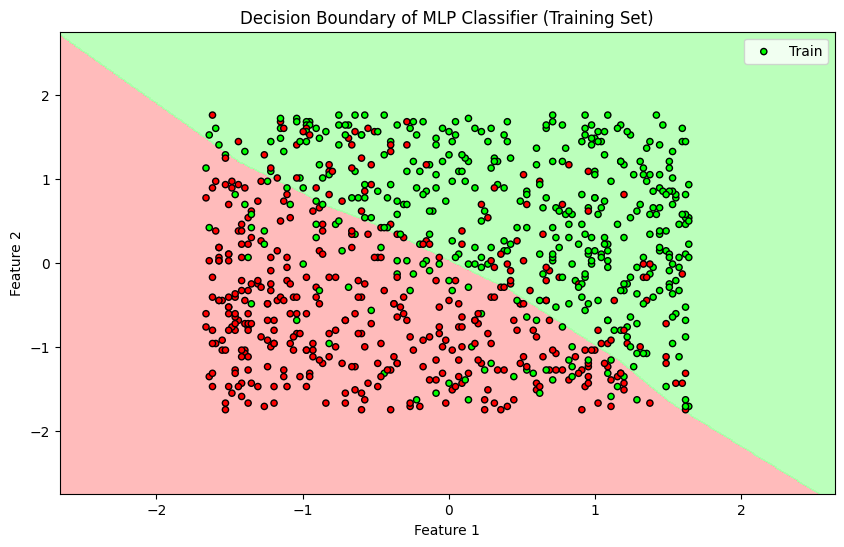

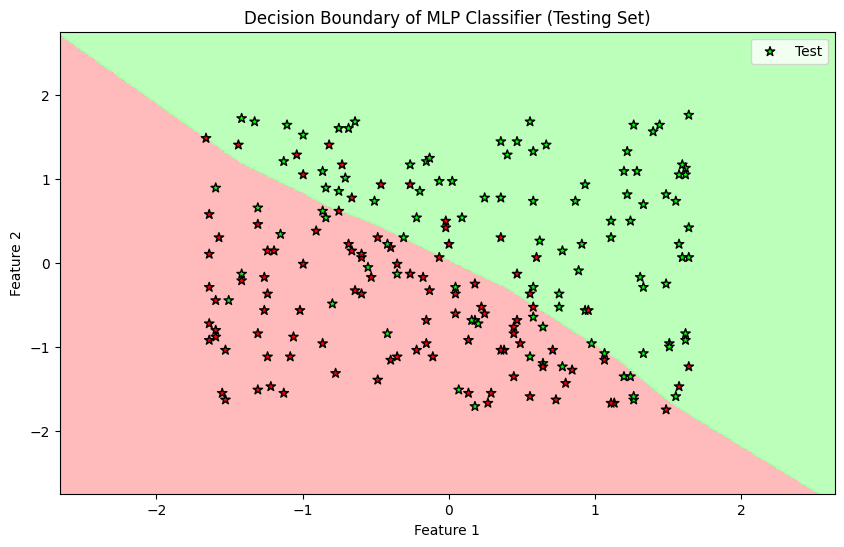

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load the Heart Disease dataset
data = pd.read_csv("/content/heart_disease_dataset.csv")

# Selecting features and target variable
X = data.iloc[:, :-1].values  # All columns except the last one as features
y = data.iloc[:, -1].values   # Last column as target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the main MLP classifier (trained on all features)
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ===========================
# Train a separate classifier for visualization (only on two selected features)
# ===========================
X_vis = data.iloc[:, [2, 3]].values  # Selecting two relevant features (adjust indexes as needed)
y_vis = data.iloc[:, -1].values  # Target labels

# Split and scale the visualization dataset
X_vis_train, X_vis_test, y_vis_train, y_vis_test = train_test_split(X_vis, y_vis, test_size=0.2, random_state=42)
scaler_vis = StandardScaler()
X_vis_train = scaler_vis.fit_transform(X_vis_train)
X_vis_test = scaler_vis.transform(X_vis_test)

# Define a new MLP model for visualization
mlp_vis = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp_vis.fit(X_vis_train, y_vis_train)

# ===========================
# Plot decision boundary for training set
# ===========================
x_min, x_max = X_vis_train[:, 0].min() - 1, X_vis_train[:, 0].max() + 1
y_min, y_max = X_vis_train[:, 1].min() - 1, X_vis_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z_train = mlp_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z_train = Z_train.reshape(xx.shape)

# Define color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_train, alpha=0.8, cmap=cmap_light)
plt.scatter(X_vis_train[:, 0], X_vis_train[:, 1], c=y_vis_train, cmap=cmap_bold, edgecolor='k', s=20, label='Train')
plt.title("Decision Boundary of MLP Classifier (Training Set)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# ===========================
# Plot decision boundary for testing set
# ===========================
x_min, x_max = X_vis_test[:, 0].min() - 1, X_vis_test[:, 0].max() + 1
y_min, y_max = X_vis_test[:, 1].min() - 1, X_vis_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z_test = mlp_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z_test = Z_test.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_test, alpha=0.8, cmap=cmap_light)
plt.scatter(X_vis_test[:, 0], X_vis_test[:, 1], c=y_vis_test, cmap=cmap_bold, edgecolor='k', s=50, label='Test', marker='*')
plt.title("Decision Boundary of MLP Classifier (Testing Set)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


## **Keras Implementation of MultiLayer Perceptron(MLP)**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.5063 - loss: 0.7282 - val_accuracy: 0.7750 - val_loss: 0.5969
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7695 - loss: 0.5848 - val_accuracy: 0.9187 - val_loss: 0.4542
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8957 - loss: 0.4530 - val_accuracy: 0.9563 - val_loss: 0.3293
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9047 - loss: 0.3388 - val_accuracy: 0.9625 - val_loss: 0.2355
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9574 - loss: 0.2398 - val_accuracy: 0.9812 - val_loss: 0.1727
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9562 - loss: 0.1895 - val_accuracy: 0.9875 - val_loss: 0.1317
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9756 - loss: 0.1520 - val_accuracy: 0.9937 - val_loss: 0.1053
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9845 - loss: 0.1248 - val_accuracy: 1.0000 - va

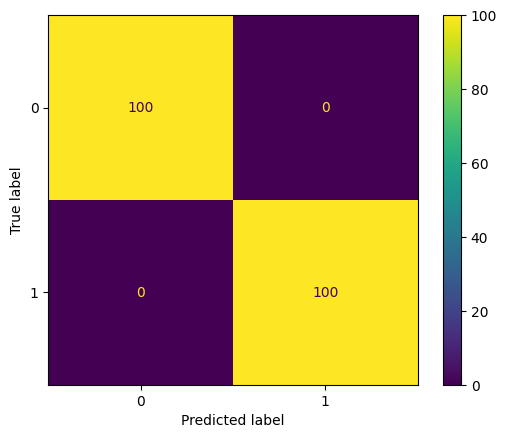

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Step 1: Load the dataset
df = pd.read_csv("/content/heart_disease_dataset.csv")

# Step 2: Separate features (X) and target variable (y)
X = df.drop(columns=["heart_disease"])  # Features
y = df["heart_disease"]  # Target variable

# Step 3: Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Build the ANN model
model = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),  # Input layer
    Dense(16, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Step 6: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 7: Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2, verbose=1)

# Step 8: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Step 9: Generate predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Step 10: Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 11: Visualize confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


## **Backward Propogation from Sratch**

Epoch 0: Error = 0.131727
Epoch 30: Error = 0.049292
Epoch 60: Error = 0.034451
Epoch 90: Error = 0.028178
Epoch 120: Error = 0.025135
Epoch 150: Error = 0.023271
Epoch 180: Error = 0.021976
Epoch 210: Error = 0.021010
Epoch 240: Error = 0.020255
Epoch 270: Error = 0.019646
Epoch 300: Error = 0.019143
Epoch 330: Error = 0.018717
Epoch 360: Error = 0.018351
Epoch 390: Error = 0.018032
Epoch 420: Error = 0.017750
Epoch 450: Error = 0.017498
Epoch 480: Error = 0.017271


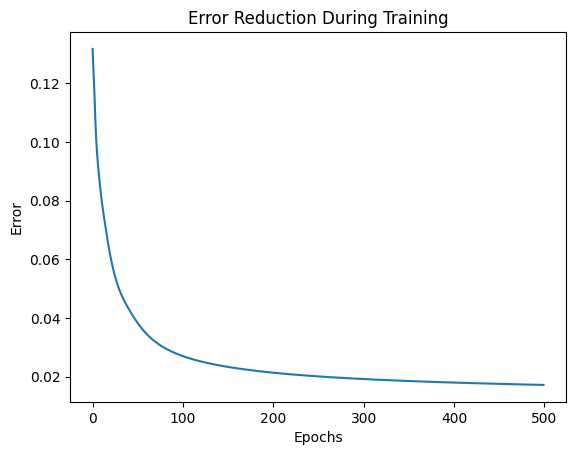

Final Predictions on Test Data: [1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


In [19]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Sigmoid Activation Function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# Derivative of Sigmoid Function
def sigmoid_derivative(x):
    return x * (1 - x)

# Feedforward function
def feed_forward(b1, b2, w1, w2, x):
    hidden = []
    output = []
    # Hidden Layer Activation
    for i in range(4):  # 4 neurons in the hidden layer
        hidden.append(sigmoid(b1 + sum(w1[i][j] * x[j] for j in range(len(x)))))
    # Output Layer Activation
    for i in range(1):  # Binary classification (1 output)
        output.append(sigmoid(b2 + sum(w2[i][j] * hidden[j] for j in range(len(hidden)))))
    return hidden, output

# Error Calculation
def find_error(output, desired):
    return sum((np.array(output) - np.array(desired))**2) / 2  # MSE

# Backpropagation
def back_propagate(w1, w2, hidden, output, desired, x, alpha):
    # Compute error terms for output layer
    delta_output = [(output[i] - desired[i]) * sigmoid_derivative(output[i]) for i in range(len(output))]
    # Compute error terms for hidden layer
    delta_hidden = []
    for i in range(len(hidden)):
        temp = sum(delta_output[j] * w2[j][i] for j in range(len(output)))
        delta_hidden.append(temp * sigmoid_derivative(hidden[i]))
    # Update weights for hidden-to-output layer
    for i in range(len(output)):
        for j in range(len(hidden)):
            w2[i][j] -= alpha * delta_output[i] * hidden[j]
    # Update weights for input-to-hidden layer
    for i in range(len(hidden)):
        for j in range(len(x)):
            w1[i][j] -= alpha * delta_hidden[i] * x[j]

# Load dataset
df = pd.read_csv("heart_disease_dataset.csv")

# Preprocessing: Handle missing values if any
df = df.fillna(df.mean())  # Fill missing values with mean of columns (if any)

# Split dataset
X = df.drop(columns=['heart_disease']).values  # All columns except 'heart_disease'
y = df['heart_disease'].values.reshape(-1, 1)  # The 'heart_disease' column

# Normalize data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize parameters
input_size = X_train.shape[1]  # Number of input features (8 in this case)
hidden_size = 4  # Hidden layer neurons
output_size = 1  # Binary classification
np.random.seed(42)
w1 = np.random.rand(hidden_size, input_size).tolist()  # Weights from input to hidden
w2 = np.random.rand(output_size, hidden_size).tolist()  # Weights from hidden to output
b1 = np.random.rand()  # Bias for hidden layer
b2 = np.random.rand()  # Bias for output layer
alpha = 0.5  # Learning rate
epochs = 500  # Training iterations
error = []

# Training loop
for epoch in range(epochs):
    total_error = 0
    for i in range(len(X_train)):
        x_sample = X_train[i]
        y_sample = y_train[i]
        hidden, output = feed_forward(b1, b2, w1, w2, x_sample)  # Forward pass
        total_error += find_error(output, y_sample)  # Compute error
        back_propagate(w1, w2, hidden, output, y_sample, x_sample, alpha)  # Backpropagation step
    error.append(total_error / len(X_train))

    # Print loss every 30 epochs
    if epoch % 30 == 0:
        print(f"Epoch {epoch}: Error = {total_error / len(X_train):.6f}")

# Plot error reduction
plt.plot(error)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Error Reduction During Training")
plt.show()

# Final Output after Training
predictions = []
for i in range(len(X_test)):
    _, output_test = feed_forward(b1, b2, w1, w2, X_test[i])
    predictions.append(1 if output_test[0] > 0.5 else 0)

print("Final Predictions on Test Data:", predictions)
